# LSTM Training

In [1]:
# Replace this with the actual directory containing the notebook and Python scripts
%cd stock-pred

/mlsteam/lab/stock-pred


In [2]:
# Global settings
WINDOW = 50
EPOCHS = 15
BATCH = 20
TEST_RATIO = .2

DATA_PATH = '/mlsteam/data/stock_prices/20220512_tesla.pkl'
SCALER_PATH = '/lab/trained/scaler.pkl'
MODEL_PATH = '/lab/trained/model'
TENSORBOARD_PATH = '/tensorboard'

# Forces to use CPU rather than GPU
# NVIDIA drivers of higher versions have messy implimentation of LSTM!
# Ref: https://github.com/mozilla/DeepSpeech/issues/3088#issuecomment-656056969
# Ref: https://github.com/tensorflow/tensorflow/issues/35950#issuecomment-577427083
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

## Load and Preprocess Data

In [3]:
from train import (load_data, transform_data, extract_x_y)

stock_dates, stock_prices = load_data(DATA_PATH)
scaler, scaled_data = transform_data(stock_prices)

train_split = int(len(scaled_data) * (1.0 - TEST_RATIO))
scaled_data_train = scaled_data[:train_split]
x_train, y_train = extract_x_y(scaled_data_train, window=WINDOW, offset=WINDOW)

## Train Model

In [4]:
from train import (build_LSTM, train_model)

model = build_LSTM(x_train, units=WINDOW)
train_model(model, x_train, y_train, EPOCHS, BATCH, interactive_progress=True, tensorboard_path=TENSORBOARD_PATH)

Epoch 1/15
7/7 [==============================] - 3s 126ms/step - loss: 0.5754 - val_loss: 0.2168
Epoch 2/15
7/7 [==============================] - 0s 30ms/step - loss: 0.2745 - val_loss: 0.2333
Epoch 3/15
7/7 [==============================] - 0s 29ms/step - loss: 0.2120 - val_loss: 0.1346
Epoch 4/15
7/7 [==============================] - 0s 27ms/step - loss: 0.1824 - val_loss: 0.1577
Epoch 5/15
7/7 [==============================] - 0s 28ms/step - loss: 0.1567 - val_loss: 0.2073
Epoch 6/15
7/7 [==============================] - 0s 30ms/step - loss: 0.1501 - val_loss: 0.2220
Epoch 7/15
7/7 [==============================] - 0s 27ms/step - loss: 0.1343 - val_loss: 0.1730
Epoch 8/15
7/7 [==============================] - 0s 27ms/step - loss: 0.1232 - val_loss: 0.1807
Epoch 9/15
7/7 [==============================] - 0s 27ms/step - loss: 0.1155 - val_loss: 0.2009
Epoch 10/15
7/7 [==============================] - 0s 26ms/step - loss: 0.1013 - val_loss: 0.1805
Epoch 11/15
7/7 [===========

## Test Model

In [5]:
from train import (predict, get_rmse, get_mape)

x_test, _ = extract_x_y(scaled_data, window=WINDOW, offset=train_split)
y_lstm_scaled = model.predict(x_test)
y_lstm = scaler.inverse_transform(y_lstm_scaled)
y_actual = stock_prices[train_split:]

rmse_lstm = get_rmse(pred=y_lstm, actual=y_actual)
mape_lstm = get_mape(pred=y_lstm, actual=y_actual)
print(f'RMSE: {rmse_lstm}, MAPE: {mape_lstm}')

RMSE: 134.61978924280368, MAPE: 0.12298846894746393


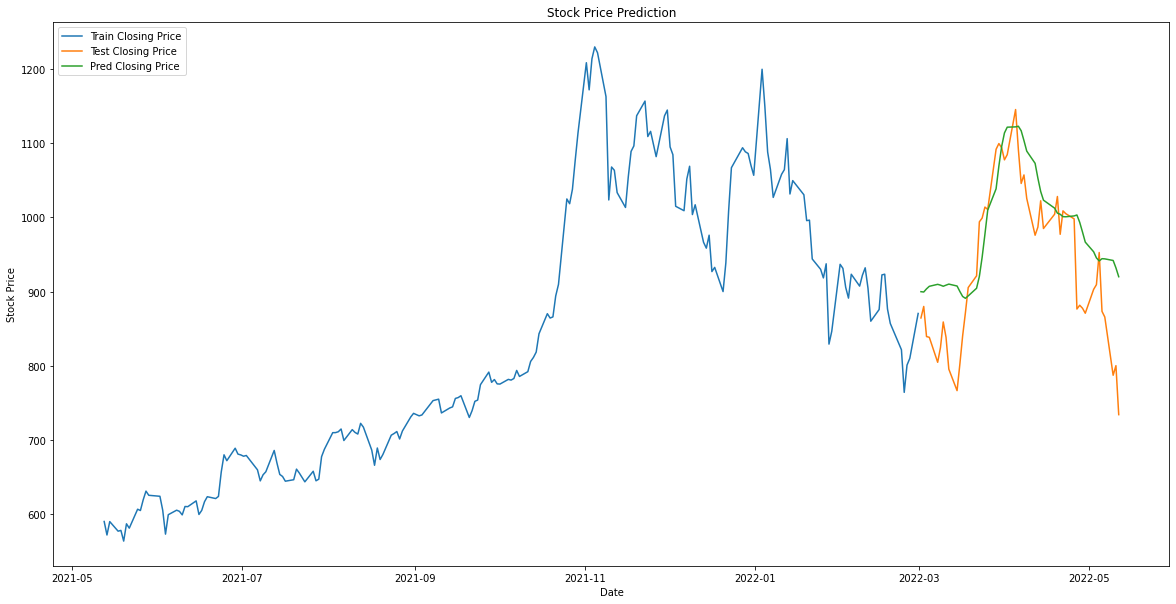

In [6]:
import matplotlib.pyplot as plt

def plot_stock(dates, y_train, y_pred, y_actual, train_pos):
    fig = plt.figure(figsize=(20, 10))
    plt.plot(dates[:train_pos], y_train, label='Train Closing Price')
    plt.plot(dates[train_pos:], y_actual, label='Test Closing Price')
    plt.plot(dates[train_pos:], y_pred, label='Pred Closing Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend(loc='upper left')

plot_stock(stock_dates, stock_prices[:train_split], y_lstm, y_actual, train_split)

## Save Scaler and Model

In [7]:
from train import (save_scaler, save_model)

save_scaler(scaler, SCALER_PATH)
save_model(model, MODEL_PATH)

INFO:tensorflow:Assets written to: /lab/trained/model/assets


INFO:tensorflow:Assets written to: /lab/trained/model/assets
